In [27]:
import pandas as pd
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The data file from asunnot.oikotie.fi is opened and cleaned for further usage in this script.

In [28]:
d=pd.read_csv("housing.csv")
d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   119 non-null    object
 1   rooms   120 non-null    object
 2   size    120 non-null    object
 3   type    120 non-null    object
 4   area    120 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB


In [29]:
d=d.convert_dtypes()

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   119 non-null    string
 1   rooms   120 non-null    string
 2   size    120 non-null    string
 3   type    120 non-null    string
 4   area    120 non-null    string
dtypes: string(5)
memory usage: 4.8 KB


In [30]:
d['size'] = d['size'].apply(lambda x: (unidecode(x)))

In [31]:
sqm=d["size"].astype(str).str.split(expand=True)

d['size'] =sqm[0].str.replace(',','.').astype(float)

In [32]:
d.price=d.price.fillna("0")


In [33]:
d['price'] = d['price'].apply(lambda x: (unidecode(x).strip("€").replace(' ','').replace('EUR',''))).astype(float)


In [34]:
d.describe()

,price,size
count,1.200000e+02,120.000000
mean,3.666915e+05,62.139167
std,2.042908e+05,27.622033
min,0.000000e+00,17.100000
25%,2.373810e+05,42.125000
50%,3.256165e+05,58.250000
75%,4.412500e+05,77.625000
max,1.630000e+06,181.500000


In [35]:
d.nsmallest(10,"price")

,price,rooms,size,type,area
83,0.0,1h + k,35.0,Kerrostalo,Kaarela
74,12278.0,3H+K,73.5,Kerrostalo,Vuosaari
80,30241.0,3H+K+S,71.0,Paritalo,Tapaninkylä
29,135600.0,1h+kk+kph-wc,29.5,Kerrostalo,Yliskylä
39,145000.0,"1h, k, alkovi, kph, lasitettu parveke",34.0,Kerrostalo,Kannelmäki
100,145000.0,"2h, k, kph, p",52.5,Kerrostalo,Kontula
106,155000.0,"2h, k, kph, lasit.parveke",58.5,Kerrostalo,Meri-Rastila
44,165000.0,2h+kk+kph+p,47.0,Kerrostalo,Vuosaari
64,165000.0,"2h, k, kph, p",52.0,Kerrostalo,Kontula
112,165000.0,"1 h, alkovi, kk, kph (Yj.1h+kk+kh)",31.0,Kerrostalo,Itä-Pasila


In [36]:
d=d.drop(83,axis=0)
d.nsmallest(10,"price")

,price,rooms,size,type,area
74,12278.0,3H+K,73.5,Kerrostalo,Vuosaari
80,30241.0,3H+K+S,71.0,Paritalo,Tapaninkylä
29,135600.0,1h+kk+kph-wc,29.5,Kerrostalo,Yliskylä
39,145000.0,"1h, k, alkovi, kph, lasitettu parveke",34.0,Kerrostalo,Kannelmäki
100,145000.0,"2h, k, kph, p",52.5,Kerrostalo,Kontula
106,155000.0,"2h, k, kph, lasit.parveke",58.5,Kerrostalo,Meri-Rastila
44,165000.0,2h+kk+kph+p,47.0,Kerrostalo,Vuosaari
64,165000.0,"2h, k, kph, p",52.0,Kerrostalo,Kontula
112,165000.0,"1 h, alkovi, kk, kph (Yj.1h+kk+kh)",31.0,Kerrostalo,Itä-Pasila
52,168000.0,"1h, avok, kph, s, wc, vh, piha",36.5,Rivitalo,Tapaninkylä


In [37]:
d.describe()

,price,size
count,1.190000e+02,119.000000
mean,3.697729e+05,62.367227
std,2.023347e+05,27.625139
min,1.227800e+04,17.100000
25%,2.397540e+05,43.500000
50%,3.262330e+05,58.500000
75%,4.435000e+05,77.750000
max,1.630000e+06,181.500000


<AxesSubplot:xlabel='area', ylabel='count'>

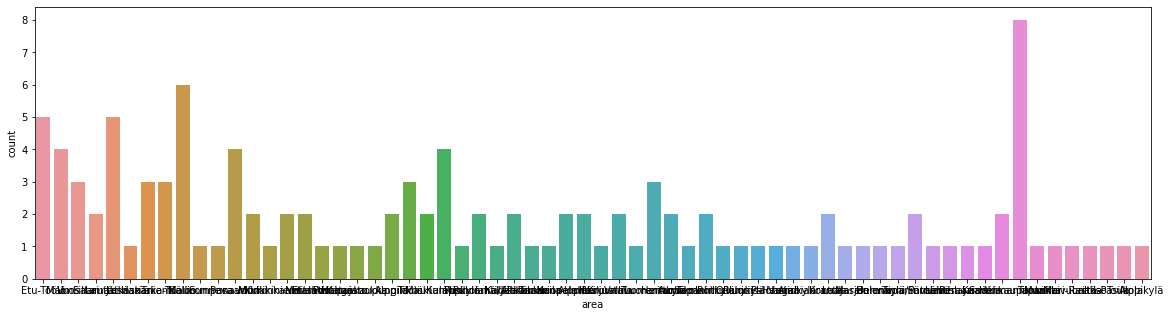

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x=d.area)

<AxesSubplot:xlabel='type', ylabel='count'>

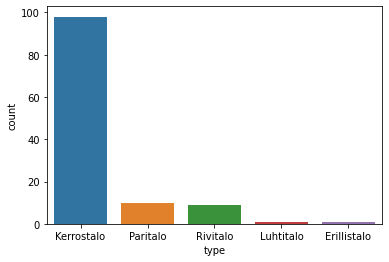

In [39]:
sns.countplot(x=d.type)

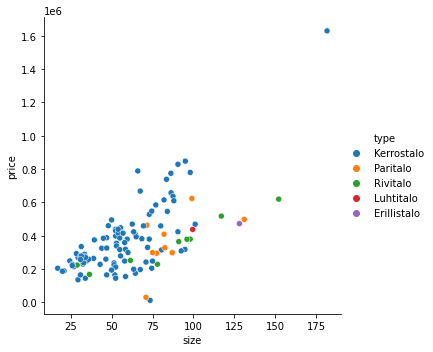

In [40]:
sns.relplot(data=d,x="size", y="price",hue="type")

In [41]:
d["p/s"]=d.price/d["size"]

<AxesSubplot:xlabel='type', ylabel='p/s'>

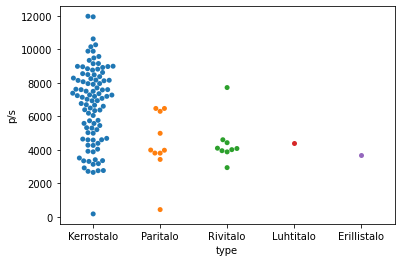

In [42]:
sns.swarmplot(data=d, x="type",y="p/s")

In [43]:
e = d.drop_duplicates()
e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   118 non-null    float64
 1   rooms   118 non-null    string 
 2   size    118 non-null    float64
 3   type    118 non-null    string 
 4   area    118 non-null    string 
 5   p/s     118 non-null    float64
dtypes: float64(3), string(3)
memory usage: 6.5 KB


We try to grab the number of rooms from the description. most posts start with the number (followed by "h" for huone)

In [44]:
d["n_room"]=d.rooms.str[0]

In [45]:
d.head()

,price,rooms,size,type,area,p/s,n_room
0,775000.0,"3 h, k, kph/ wc (yj muk. 3h+k)",86.2,Kerrostalo,Etu-Töölö,8990.719258,3
1,409000.0,3h+kt+s+piha ja terassi (Yj:n mukaan 3h+kt+s),82.0,Paritalo,Malmi,4987.804878,3
2,315000.0,4h+kph+wc+vh+lasitettu parveke (yhtiöjärjestyk...,80.5,Kerrostalo,Vuosaari,3913.043478,4
3,229000.0,3h+kk+kph+s+wc+p+piha (yhtiöjärjestyksen mukaa...,78.0,Rivitalo,Siltamäki,2935.897436,3
4,228000.0,2h+kk+kph+parveke (yhtiöjärjestyksen mukaan 2h...,43.0,Kerrostalo,Lauttasaari,5302.325581,2


we check what we got with this approach and look at the special cases:

In [46]:
d["n_room"].unique()

<StringArray>
['3', '4', '2', '1', 'K', '5', 'O', 'k']
Length: 8, dtype: string

In [47]:
d[d["n_room"]=="k"]

,price,rooms,size,type,area,p/s,n_room
97,270000.0,"kaksio, avok, kph",34.1,Kerrostalo,Meilahti,7917.888563,k


In [48]:
d.at[97,"n_room"]="2"
d.loc[97]

price              270000.0
rooms     kaksio, avok, kph
size                   34.1
type             Kerrostalo
area               Meilahti
p/s             7917.888563
n_room                    2
Name: 97, dtype: object

In [49]:
d[d["n_room"]=="K"]

,price,rooms,size,type,area,p/s,n_room
16,237000.0,Kaunis parvekkeellinen koti v.2019 valmistunee...,51.5,Kerrostalo,Kuninkaantammi,4601.941748,K


we can't see the number of rooms from this description, so we drop this row for now.

In [50]:
d=d.drop(16,axis=0)

In [51]:
d[d["n_room"]=="O"]

,price,rooms,size,type,area,p/s,n_room
66,248000.0,Oh+2 mh+kph+s+wc+vh+lasitettu parveke (yhtiöjä...,75.0,Kerrostalo,Kannelmäki,3306.666667,O


living room plus two sleeping rooms ->3

In [54]:
d.at[66,"n_room"]="3"
d.loc[66]

price                                              248000.0
rooms     Oh+2 mh+kph+s+wc+vh+lasitettu parveke (yhtiöjä...
size                                                   75.0
type                                             Kerrostalo
area                                             Kannelmäki
p/s                                             3306.666667
n_room                                                    3
Name: 66, dtype: object

In [55]:
d.n_room=pd.to_numeric(d.n_room, downcast="integer")
d["n_room"].unique()

array([3, 4, 2, 1, 5], dtype=int8)

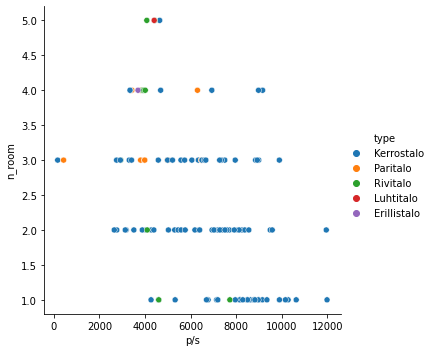

In [56]:
sns.relplot(data=d,x="p/s",y="n_room",hue="type")

it looks as if appartments with less rooms have a higher sqm price.

In [57]:
d.describe()

,price,size,p/s,n_room
count,1.180000e+02,118.000000,118.000000,118.000000
mean,3.708981e+05,62.459322,6323.168295,2.364407
std,2.028233e+05,27.724593,2367.174448,1.075486
min,1.227800e+04,17.100000,167.047619,1.000000
25%,2.435000e+05,43.250000,4267.494929,2.000000
50%,3.271165e+05,58.500000,6553.633094,2.000000
75%,4.457500e+05,77.875000,8145.614955,3.000000
max,1.630000e+06,181.500000,11988.304094,5.000000


In [58]:
by_district=d.groupby(["area","type","n_room"])["p/s"].mean().reset_index()

In [59]:
by_district.head()

,area,type,n_room,p/s
0,Ala-Tikkurila,Paritalo,4,3425.287356
1,Alppiharju,Kerrostalo,1,9350.000000
2,Alppiharju,Kerrostalo,2,6189.655172
3,Alppikylä,Rivitalo,4,4010.989011
4,Alppila,Kerrostalo,1,6769.230769


most expensive, by sqm-price:

In [60]:
mi=by_district["p/s"].idxmax()
by_district.loc[mi,["area","type","n_room"]]

area       Etu-Töölö
type      Kerrostalo
n_room             1
Name: 9, dtype: object

cheapest, by sqm price:

In [61]:
mini=by_district["p/s"].idxmin()
by_district.loc[mini,["area","type","n_room"]]

area        Vuosaari
type      Kerrostalo
n_room             3
Name: 91, dtype: object

In [62]:
kt=d[d.type=="Kerrostalo"]

In [63]:
kt.describe()

,price,size,p/s,n_room
count,9.700000e+01,97.000000,97.000000,97.00000
mean,3.712717e+05,57.069072,6749.239926,2.14433
std,2.137127e+05,24.404808,2308.897458,0.93530
min,1.227800e+04,17.100000,167.047619,1.00000
25%,2.375080e+05,36.000000,5027.027027,1.00000
50%,3.190000e+05,55.000000,7194.444444,2.00000
75%,4.390000e+05,72.000000,8377.862595,3.00000
max,1.630000e+06,181.500000,11988.304094,5.00000


In [64]:
kt.area.unique()

<StringArray>
[            'Etu-Töölö',              'Vuosaari',           'Lauttasaari',
            'Jätkäsaari',             'Hakaniemi',            'Taka-Töölö',
                'Kallio',            'Sompasaari',             'Punavuori',
                'Viikki',           'Munkkiniemi',                 'Malmi',
              'Meilahti',           'Etelä-Haaga',           'Postipuisto',
           'Katajanokka',  'Vanhankaupunginkoski',               'Alppila',
                 'Töölö',               'Maunula',                'Kamppi',
              'Yliskylä',             'Pukinmäki', 'Ruoholahti/Jätkäsaari',
            'Kalasatama',      'Pikku Huopalahti',            'Kannelmäki',
            'Alppiharju',              'Keskusta',               'Vallila',
     'Kruunuvuorenranta',           'Herttoniemi',          'Aurinkolahti',
            'Roihuvuori',             'Oulunkylä',         'Pohjois-Haaga',
          'Arabianranta',               'Kontula',             'Laajasalo'

In [65]:
kt.area.value_counts()

Hermanninranta           8
Kallio                   6
Etu-Töölö                5
Lauttasaari              5
Kamppi                   4
Punavuori                4
Vuosaari                 3
Hakaniemi                3
Taka-Töölö               3
Töölö                    3
Herttoniemi              2
Meilahti                 2
Alppila                  2
Maunula                  2
Kaartinkaupunki          2
Kannelmäki               2
Vallila                  2
Kalasatama               2
Alppiharju               2
Pukinmäki                2
Kontula                  2
Yliskylä                 1
Katajanokka              1
Ruoholahti/Jätkäsaari    1
Postipuisto              1
Pikku Huopalahti         1
Pohjois-Haaga            1
Etelä-Haaga              1
Keskusta                 1
Malmi                    1
Kruunuvuorenranta        1
Munkkiniemi              1
Aurinkolahti             1
Roihuvuori               1
Oulunkylä                1
Vanhankaupunginkoski     1
Jätkäsaari               1
V

most posts were "kerrostalo", so for further comparison, we can ignore other house types

In [ ]:
kt.to_csv("clean_kt.csv",index=False)